<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudyFiltered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [3]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
330,2022-08-06,The Ten Commandments,Movie,7.9,220,1956,"Adventure, Drama, Family, History",77890,1956-10-05 00:00:00,Cecil B. DeMille,To watch with mom
331,2022-04-08,Gone with the Wind,Movie,8.2,238,1939,"Drama, Romance, War",334371,1939-12-15 00:00:00,"Sam Wood, George Cukor, Victor Fleming",Not classified
332,2022-02-18,The Greatest Story Ever Told,Movie,6.6,260,1965,"Biography, Drama, History",11934,1965-02-15 00:00:00,"George Stevens, Jean Negulesco",To watch with mom
333,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom
334,2022-09-15,Novecento,Movie,7.6,317,1976,"Drama, History",27289,1976-05-21 00:00:00,Bernardo Bertolucci,To watch with mom


In [4]:
# Filtering the dataset by Status = 'To watch with mom':
to_watch_with_mom = wl[(wl['Status'] == 'To watch with mom')]

In [5]:
# Displaying the number of rows and columns in the filtered dataset:
to_watch_with_mom.shape

(88, 11)

In [6]:
# Displaying the datatypes of each column:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 334
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      88 non-null     datetime64[ns]
 1   Title           88 non-null     object        
 2   Title Type      88 non-null     object        
 3   IMDb Rating     88 non-null     float64       
 4   Runtime (mins)  88 non-null     int64         
 5   Year            88 non-null     int64         
 6   Genres          88 non-null     object        
 7   Num Votes       88 non-null     int64         
 8   Release Date    88 non-null     object        
 9   Directors       87 non-null     object        
 10  Status          88 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 8.2+ KB


In [7]:
# Displaying statistical data of the numerical data present in the filtered dataset:
to_watch_with_mom.describe()

,Date added,IMDb Rating,Runtime (mins),Year,Num Votes
count,88,88.000000,88.000000,88.000000,88.000000
mean,2022-12-18 05:10:54.545454592,6.873864,128.511364,1984.727273,68852.977273
min,2020-04-29 00:00:00,4.900000,74.000000,1940.000000,1111.000000
25%,2022-01-29 00:00:00,6.400000,104.000000,1966.000000,4291.750000
50%,2022-11-16 00:00:00,6.900000,112.000000,1987.000000,16887.500000
75%,2023-10-28 00:00:00,7.425000,130.500000,2001.000000,66812.500000
max,2025-01-19 00:00:00,8.600000,317.000000,2023.000000,593056.000000
std,NaN,0.787473,44.219670,20.408882,123866.091828


# **Basic column data plotting**

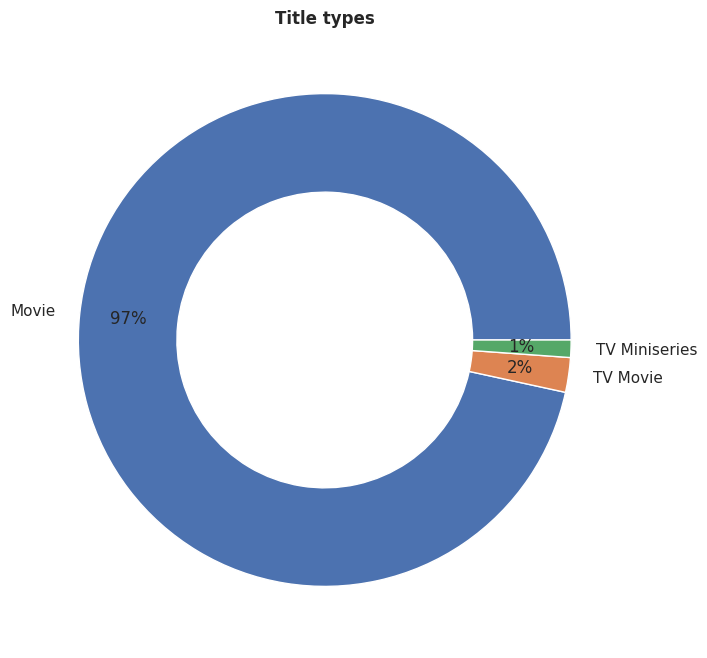

In [8]:
# Displaying the title types present in the filtered dataset:
to_watch_with_mom['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [9]:
# Creating a datetime object based on the dates from the filtered dataset:
to_watch_with_mom['Date added'] = to_watch_with_mom['Date added'].map(pd.to_datetime)
to_watch_with_mom['Day Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.day)
to_watch_with_mom['Month Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.month)
to_watch_with_mom['Year Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.year)
to_watch_with_mom['Weekday Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column in the filtered dataset:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 334
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date added       88 non-null     datetime64[ns]
 1   Title            88 non-null     object        
 2   Title Type       88 non-null     object        
 3   IMDb Rating      88 non-null     float64       
 4   Runtime (mins)   88 non-null     int64         
 5   Year             88 non-null     int64         
 6   Genres           88 non-null     object        
 7   Num Votes        88 non-null     int64         
 8   Release Date     88 non-null     object        
 9   Directors        87 non-null     object        
 10  Status           88 non-null     object        
 11  Day Created      88 non-null     int64         
 12  Month Created    88 non-null     int64         
 13  Year Created     88 non-null     int64         
 14  Weekday Created  88 non-null     int64         


<ipython-input-9-7452e0626699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Date added'] = to_watch_with_mom['Date added'].map(pd.to_datetime)
<ipython-input-9-7452e0626699>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Day Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.day)
<ipython-input-9-7452e0626699>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

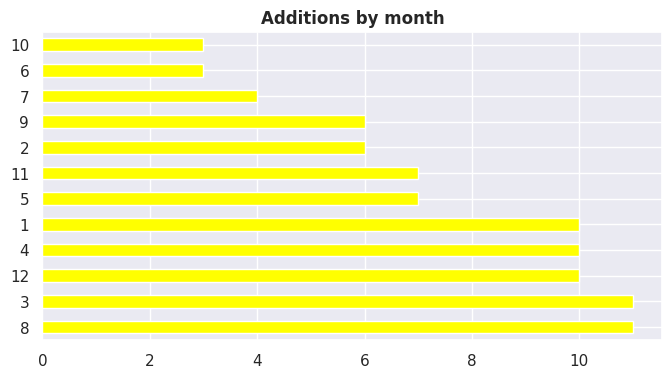

In [10]:
# Displaying the months with most and less additions:
to_watch_with_mom['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

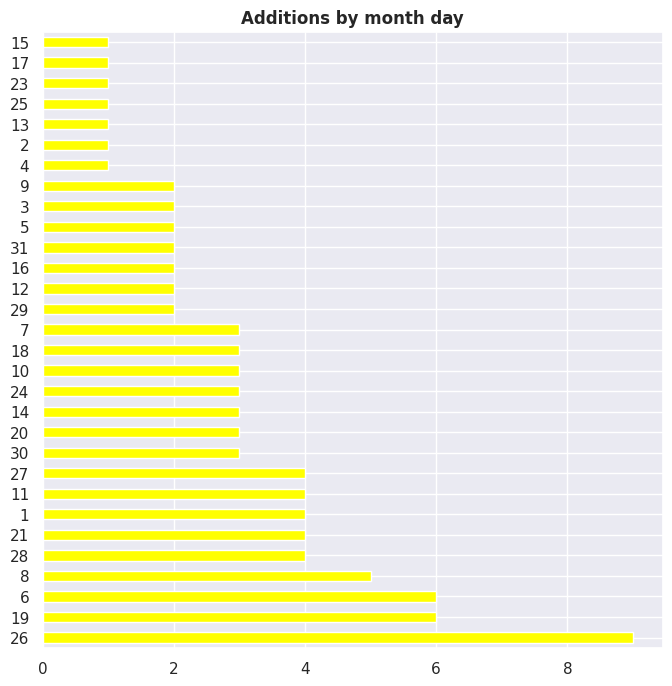

In [11]:
# Displaying the month days with most and less additions:
to_watch_with_mom['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

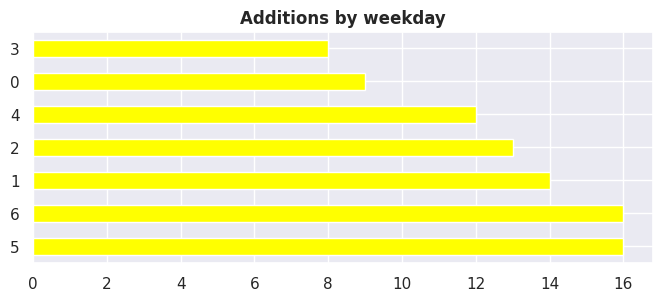

In [12]:
# Displaying the weekdays with most and less additions:
to_watch_with_mom['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

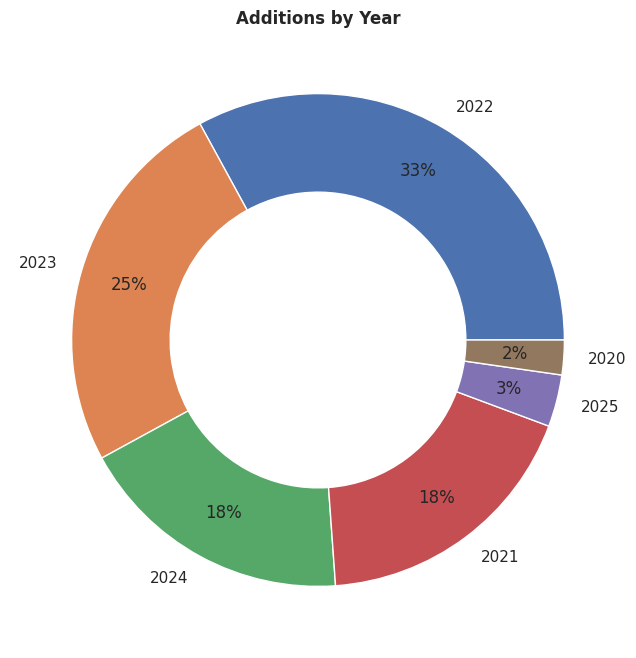

In [13]:
# Displaying the years with most and less additions:
to_watch_with_mom['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

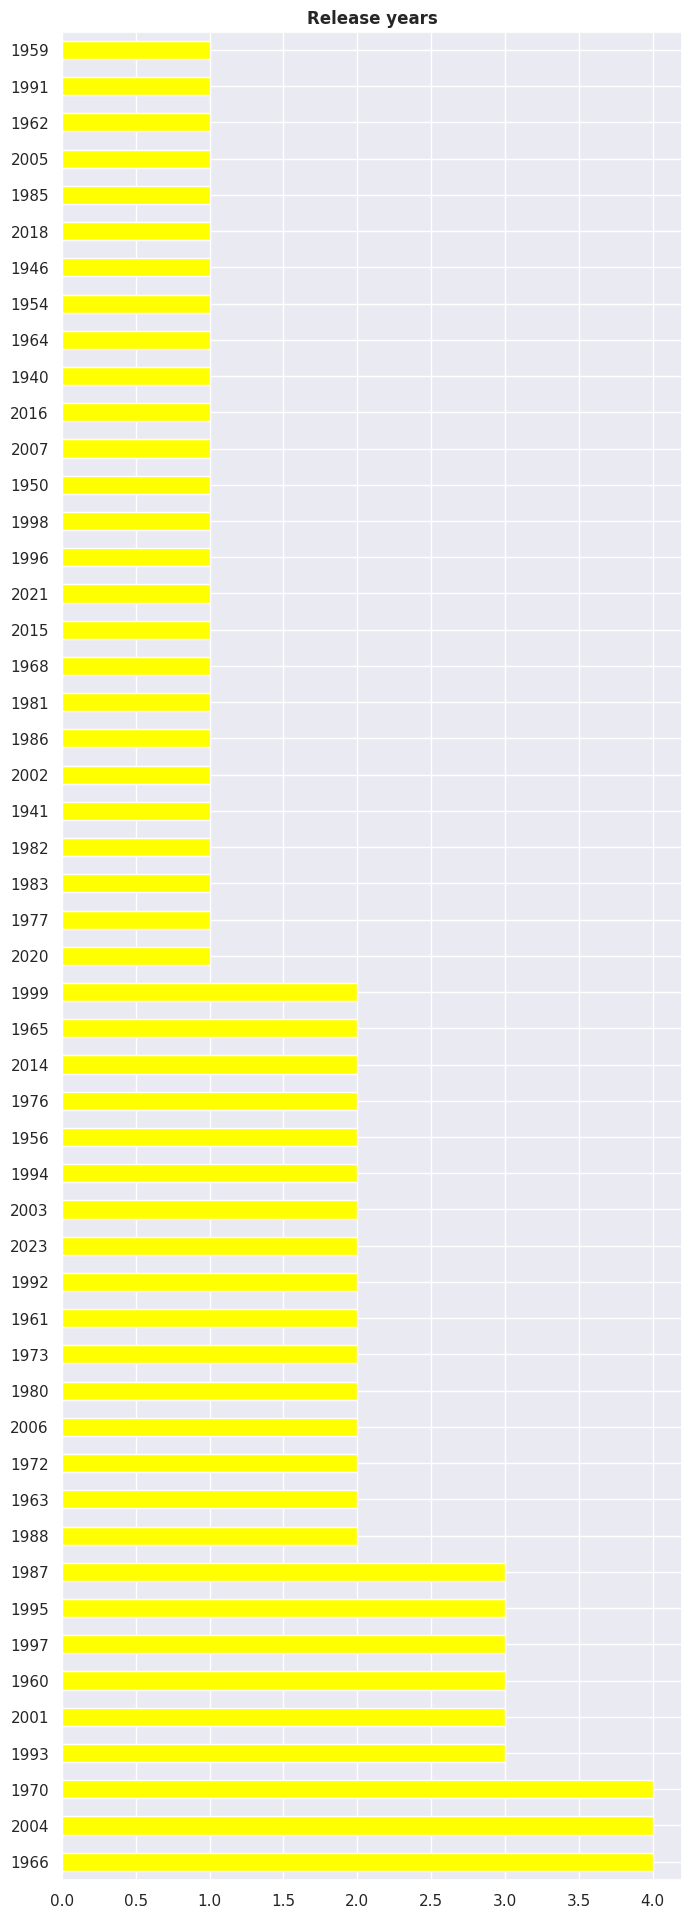

In [14]:
# Displaying distibution of release years in the dataset:
to_watch_with_mom['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

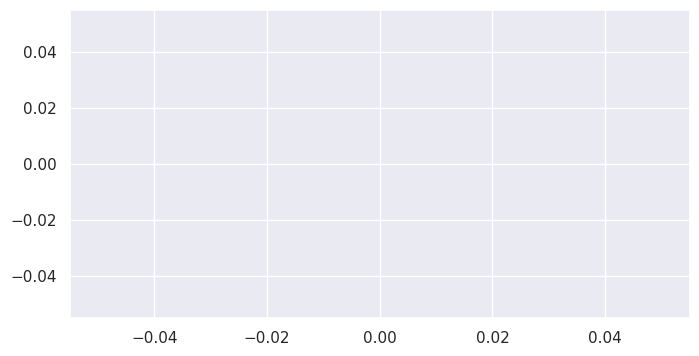

In [15]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = to_watch_with_mom.groupby('Date added').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Date added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [16]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)
to_watch_with_mom.head()

<ipython-input-16-33659bbd6e5a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s
5,2024-06-14,The Incredible Journey,Movie,7.0,80,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s
8,2023-07-14,Ride in the Whirlwind,Movie,6.4,82,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s
9,2022-12-28,Osama,Movie,7.3,83,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s
31,2023-03-28,Deadly Friend,Movie,5.5,91,1986,"Drama, Horror, Sci-Fi, Thriller",8742,1986-10-10 00:00:00,Wes Craven,To watch with mom,28,3,2023,1,1980s


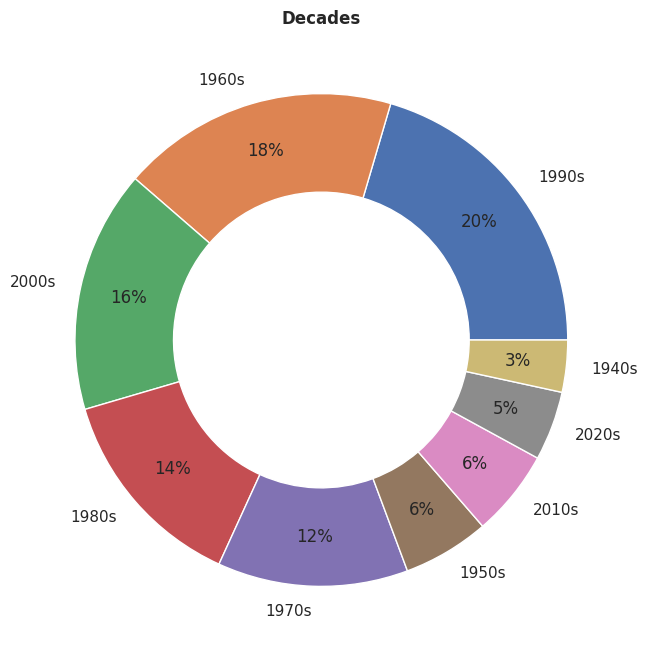

In [17]:
# Displaying the decades the movies are from:
to_watch_with_mom['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)
to_watch_with_mom.head()

<ipython-input-18-c0a382964691>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing
5,2024-06-14,The Incredible Journey,Movie,7.0,80,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good
8,2023-07-14,Ride in the Whirlwind,Movie,6.4,82,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay
9,2022-12-28,Osama,Movie,7.3,83,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good
31,2023-03-28,Deadly Friend,Movie,5.5,91,1986,"Drama, Horror, Sci-Fi, Thriller",8742,1986-10-10 00:00:00,Wes Craven,To watch with mom,28,3,2023,1,1980s,Regular


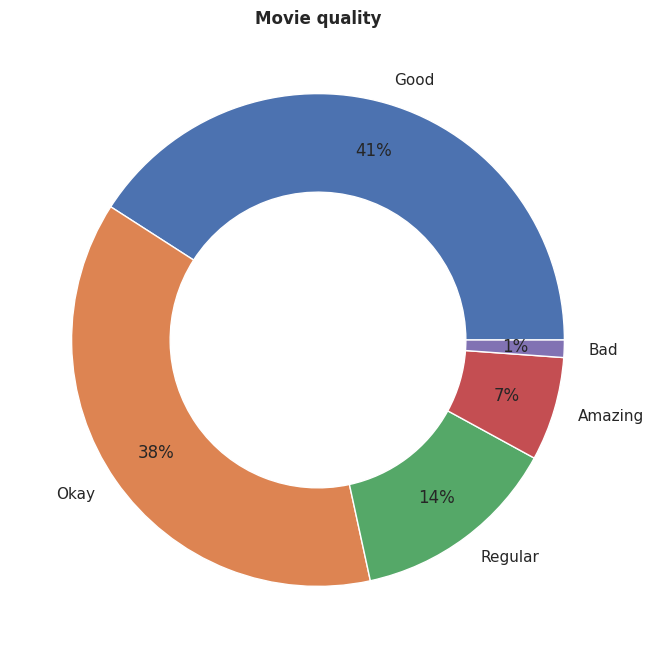

In [19]:
# Displaying the movie rating classification based on the algorithm above:
to_watch_with_mom['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)
to_watch_with_mom.head()

<ipython-input-20-cebfd6ec921e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes
5,2024-06-14,The Incredible Journey,Movie,7.0,80,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good,Less than 250k votes
8,2023-07-14,Ride in the Whirlwind,Movie,6.4,82,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay,Less than 250k votes
9,2022-12-28,Osama,Movie,7.3,83,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good,Less than 250k votes
31,2023-03-28,Deadly Friend,Movie,5.5,91,1986,"Drama, Horror, Sci-Fi, Thriller",8742,1986-10-10 00:00:00,Wes Craven,To watch with mom,28,3,2023,1,1980s,Regular,Less than 250k votes


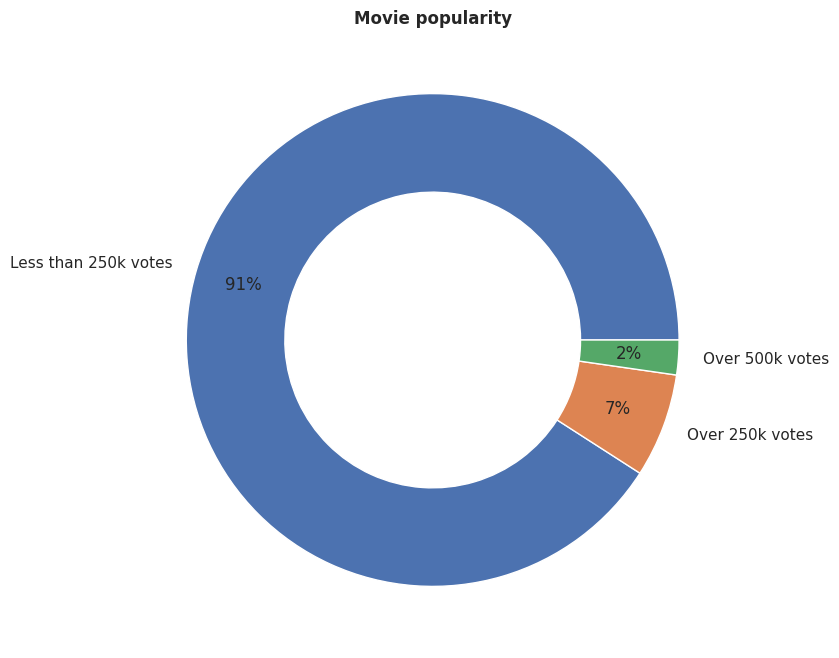

In [21]:
# Displaying the movie popularity based on the algorithm above:
to_watch_with_mom['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)
to_watch_with_mom.head()

<ipython-input-22-5c4972d8f521>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29
5,2024-06-14,The Incredible Journey,Movie,7.0,80,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good,Less than 250k votes,Between 1h10 and 1h29
8,2023-07-14,Ride in the Whirlwind,Movie,6.4,82,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay,Less than 250k votes,Between 1h10 and 1h29
9,2022-12-28,Osama,Movie,7.3,83,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good,Less than 250k votes,Between 1h10 and 1h29
31,2023-03-28,Deadly Friend,Movie,5.5,91,1986,"Drama, Horror, Sci-Fi, Thriller",8742,1986-10-10 00:00:00,Wes Craven,To watch with mom,28,3,2023,1,1980s,Regular,Less than 250k votes,Between 1h30 and 1h39


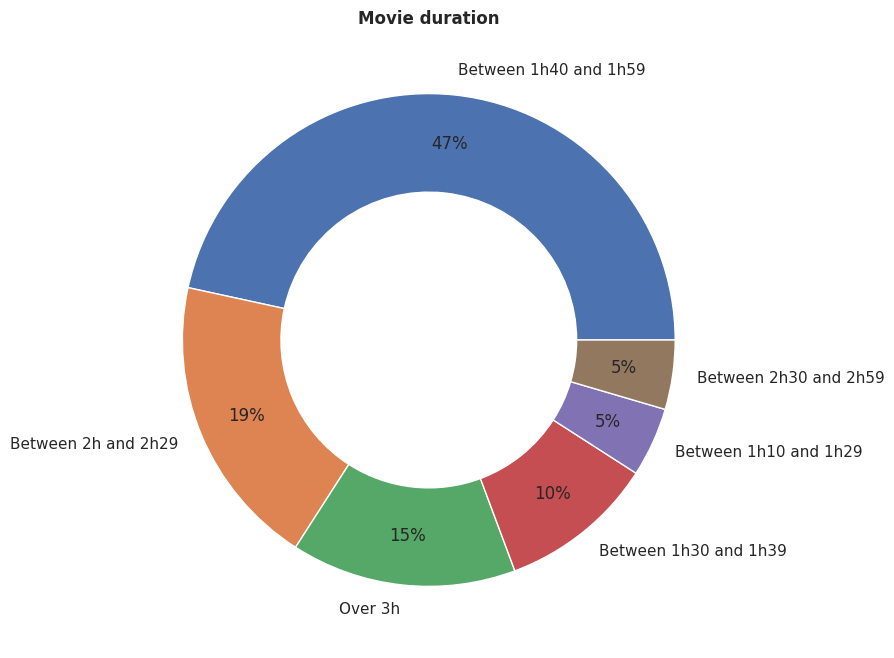

In [23]:
# Displaying the movie duration based on the algorithm above:
to_watch_with_mom['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)
to_watch_with_mom.head()

<ipython-input-25-a88387f4e083>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth
5,2024-06-14,The Incredible Journey,Movie,7.0,80,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,To watch with mom,14,6,2024,4,1960s,Good,Less than 250k votes,Between 1h10 and 1h29,Second
8,2023-07-14,Ride in the Whirlwind,Movie,6.4,82,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,To watch with mom,14,7,2023,4,1960s,Okay,Less than 250k votes,Between 1h10 and 1h29,Third
9,2022-12-28,Osama,Movie,7.3,83,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,To watch with mom,28,12,2022,2,2000s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth
31,2023-03-28,Deadly Friend,Movie,5.5,91,1986,"Drama, Horror, Sci-Fi, Thriller",8742,1986-10-10 00:00:00,Wes Craven,To watch with mom,28,3,2023,1,1980s,Regular,Less than 250k votes,Between 1h30 and 1h39,First


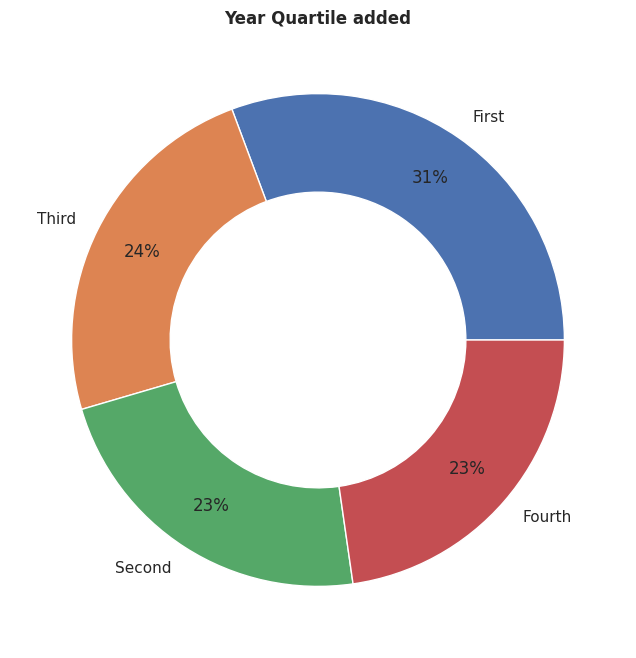

In [26]:
# Displaying the quartile the movie was added based on the algorithm above:
to_watch_with_mom['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)
to_watch_with_mom.head()

<ipython-input-27-a7e4e0574ba8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,...,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second
5,2024-06-14,The Incredible Journey,Movie,7.0,80,1963,"Adventure, Drama, Family",5257,1963-11-20 00:00:00,Fletcher Markle,...,14,6,2024,4,1960s,Good,Less than 250k votes,Between 1h10 and 1h29,Second,First
8,2023-07-14,Ride in the Whirlwind,Movie,6.4,82,1966,"Drama, Western",4402,1966-09-14 00:00:00,Monte Hellman,...,14,7,2023,4,1960s,Okay,Less than 250k votes,Between 1h10 and 1h29,Third,First
9,2022-12-28,Osama,Movie,7.3,83,2003,Drama,9533,2003-05-20 00:00:00,Siddiq Barmak,...,28,12,2022,2,2000s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second
31,2023-03-28,Deadly Friend,Movie,5.5,91,1986,"Drama, Horror, Sci-Fi, Thriller",8742,1986-10-10 00:00:00,Wes Craven,...,28,3,2023,1,1980s,Regular,Less than 250k votes,Between 1h30 and 1h39,First,Second


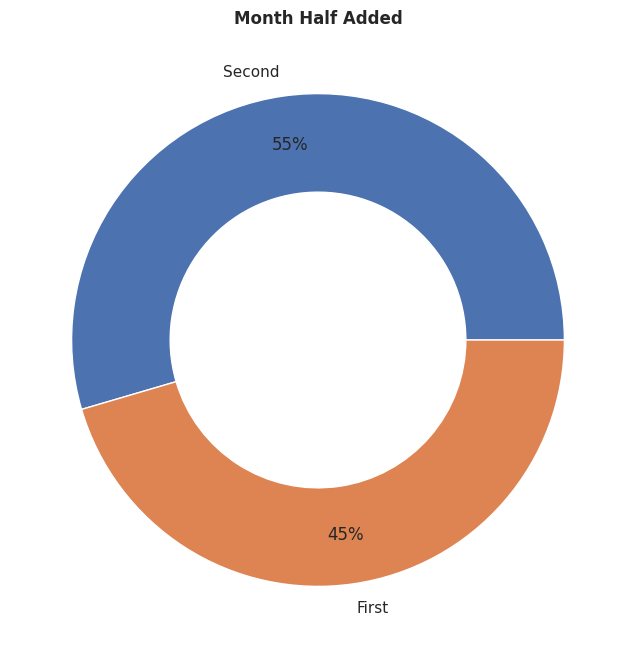

In [28]:
# Displaying the month half the movie was added based on the algorithm above:
to_watch_with_mom['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [29]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-29-7f07c1d7911d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [30]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action          77    11
Adventure       71    17
Animation       87     1
Biography       72    16
Comedy          71    17
Crime           73    15
Documentary     87     1
Drama           11    77
Family          80     8
Fantasy         84     4
Film-Noir       86     2
History         78    10
Horror          86     2
Music           83     5
Mystery         86     2
Romance         71    17
Sci-Fi          83     5
Sport           82     6
Thriller        79     9
War             75    13
Western         80     8


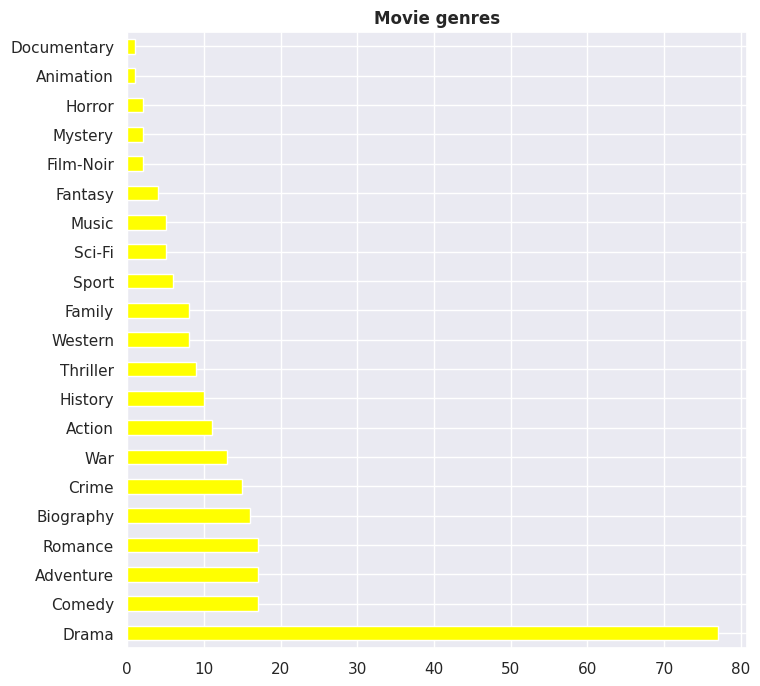

In [31]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [32]:
to_watch_with_mom = to_watch_with_mom[to_watch_with_mom['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-32-08fa5ebcc414>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [33]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                   False  True
Alex Segal            86     0
Andrew Erwin          86     0
Andrew Marton         86     0
Arthur Penn           86     0
Barry Levinson        86     0
...                  ...   ...
Wally Pfister         86     0
Walter Salles         86     1
Wes Craven            85     0
William Wyler         86     0
Wolfgang Petersen     86     0

[91 rows x 2 columns]


In [34]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
# Displaying dates with most additions:
dir = final_directors_counts[final_directors_counts['True'] > 1] # Filtering DataFrame based on values in 'True' column

# Check if 'dir' DataFrame is empty before plotting
if not dir.empty:
  dir['True'].sort_values(ascending=False).plot(kind='barh', color='yellow', figsize=(8, 4))
  plt.ylabel(None)
  plt.title('Movie directors', fontweight='bold')
  plt.show()
else:
  print("No directors found with more than 1 movies in the watchlist.")

No directors found with more than 1 movies in the watchlist.
